IMPORT LIBRARY

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BACA DATA

In [3]:
df = pd.read_csv("dirty_cafe_sales.csv")

DATA UNDERSTANDING

In [4]:
#Check isi 5 random
print("=== ISI 5 DATA ===")
df.sample(5)

=== ISI 5 DATA ===


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
3282,TXN_1459078,Cookie,5,1.0,5.0,NaN,In-store,2023-11-10
2089,TXN_2093816,Sandwich,ERROR,4.0,12.0,Cash,Takeaway,2023-04-06
3129,TXN_5137315,Salad,UNKNOWN,5.0,25.0,Credit Card,In-store,2023-01-05
2202,TXN_5855981,Juice,2,3.0,6.0,Cash,NaN,2023-11-09
3748,TXN_1720329,Cookie,2,1.0,UNKNOWN,Cash,NaN,2023-04-06


In [5]:
#Check info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


##INFO PADA TIPE DATA
- Item = Object ✅
- Quantity = Object ❌ --> int
- Price Per Unit = Object ❌ --> int
- Total Spent = Object ❌ --> int
- Payment Method = Object ✅
- Location = Object ✅
- Transaction Date = Object ❌ --> timedate

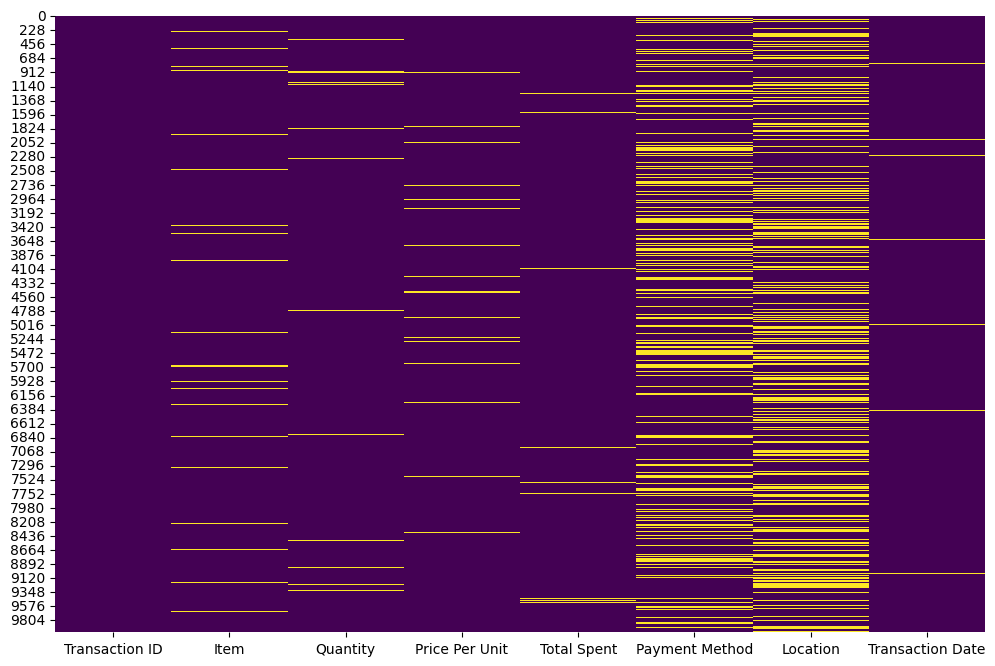

In [6]:
#Check missing values masing-masing kolom
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [7]:
#Hitung presentase missing values setiap kolom
missing_value_presentase = (df.isnull().sum()/len(df))*100
missing_value_presentase

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64

In [8]:
#Melihat statistik tabel (numeric)
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [9]:
#Check kata unik setiap kolom
df.nunique()

Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

In [10]:
#Check kata unik yang di bawah 20
cek_kolom_unik = ['Item','Quantity','Price Per Unit','Total Spent','Payment Method','Location']
for col in cek_kolom_unik:
    print(f"Kolom {col} = {df[col].unique()}")

Kolom Item = ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
Kolom Quantity = ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
Kolom Price Per Unit = ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
Kolom Total Spent = ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
Kolom Payment Method = ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
Kolom Location = ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']


Data Cleaning

In [11]:
#Mengubah Quantity, Price per unit, Total Spent = numeric
perubahan_kolom_numeric = ['Quantity','Price Per Unit', 'Total Spent']

for kolom in perubahan_kolom_numeric:
    df[kolom] = pd.to_numeric(df[kolom], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              9667 non-null   object 
 2   Quantity          9521 non-null   float64
 3   Price Per Unit    9467 non-null   float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [12]:
#Mengubah location = timedate
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


##DIKETAHUI
Missing Values pada kolom Total Spent, Quantity, Price per Unit adalah <5% dan tipe data adalah numeric.
Maka, ganti NaN dengan nilai median

In [13]:
#Handle missing kolom numeric
missing_handle_numeric = ['Quantity','Price Per Unit','Total Spent']
for col in missing_handle_numeric:
    #perhitungan median
    median_value = df[col].median()
    #fillna dengan median_value
    df[col] = df[col].fillna(median_value)
print(df.isnull().sum())

Transaction ID         0
Item                 333
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64


##Kategori
Kolom Item = ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich'
 'Unknown' 'ERROR' 'Juice' 'Tea']
Kolom Payment Method = ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' 'Unknown']
Kolom Location = ['Takeaway' 'In-store' 'UNKNOWN' 'Unknown' 'ERROR']

In [14]:
#Handle missing kolom kategori
handle_missing_kategori = ['Payment Method','Location','Item']
for col in handle_missing_kategori:
    df[col] = df[col].fillna("Unknown")
print(df.isnull().sum())

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    460
dtype: int64


In [15]:
#Setelah kategori dilakukan fillna, ganti kata UNKWON dan ERROR agar data konsisten
for col in handle_missing_kategori:
    df[col] = df[col].replace(["UNKNOWN","ERROR"],"Unknown")
    #check hasil
    print(f"Kolom {col} = {df[col].unique()}")

Kolom Payment Method = ['Credit Card' 'Cash' 'Unknown' 'Digital Wallet']
Kolom Location = ['Takeaway' 'In-store' 'Unknown']
Kolom Item = ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'Unknown' 'Sandwich' 'Juice'
 'Tea']


In [16]:
#Drop kolom datetime
df = df.dropna(subset=['Transaction Date'])
print(df.isnull().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


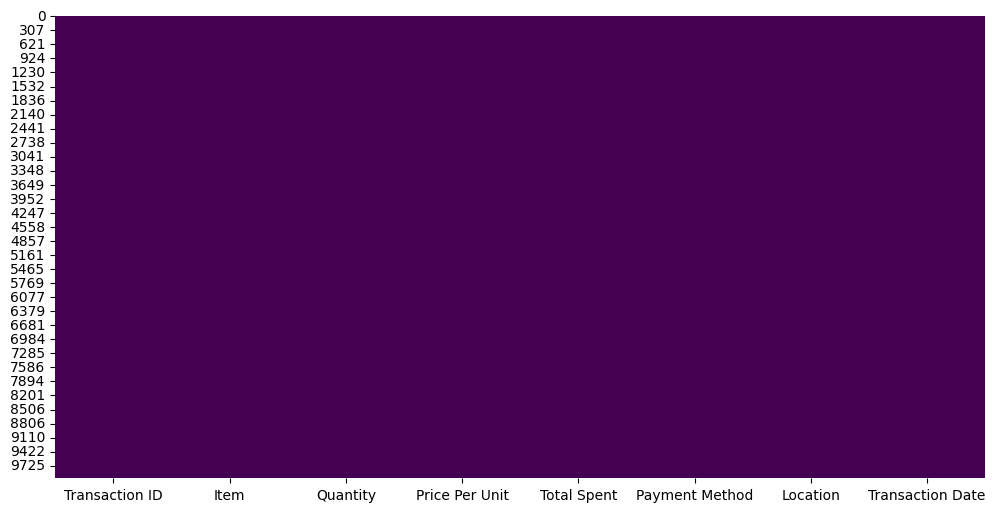

In [17]:
#Final check missing values dengan heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

EXPLORATORY DATA ANALYSIST (EDA)

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\3553788774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_item.index, y=top_selling_item.values, palette="Reds_r")


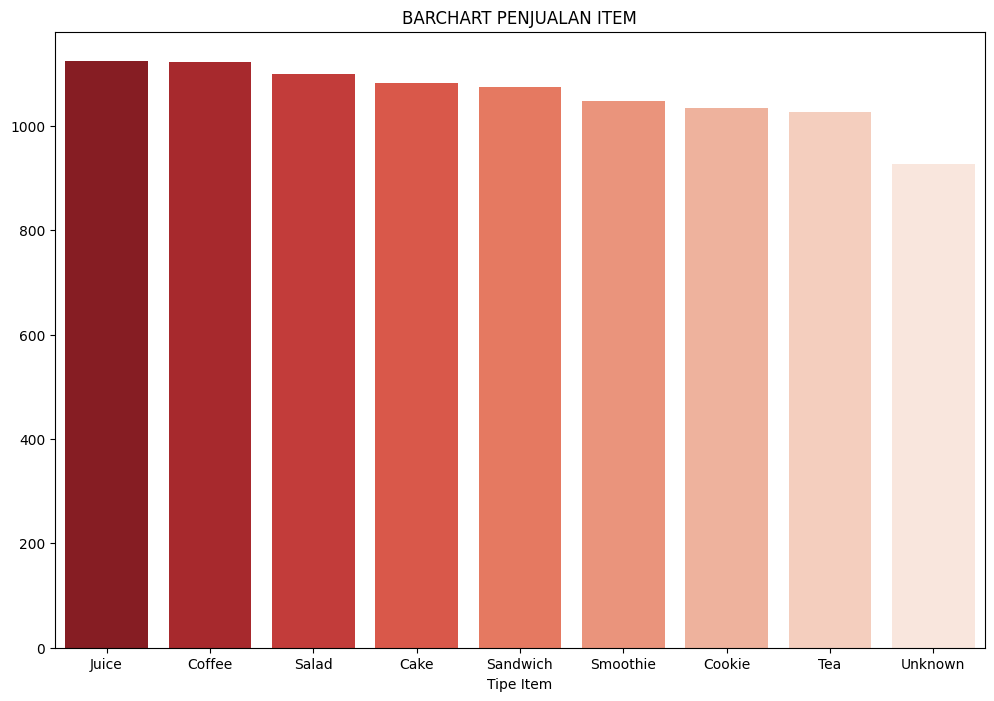

In [18]:
#Penjualan item terbanyak?

#hitung value pada kolom item
top_selling_item = df['Item'].value_counts().sort_values(ascending=False)

#buat visualisasinya
plt.figure(figsize=(12,8))
sns.barplot(x=top_selling_item.index, y=top_selling_item.values, palette="Reds_r")
plt.title("BARCHART PENJUALAN ITEM")
plt.xlabel("Tipe Item")
plt.show()

In [19]:
top_selling_item

Item
Juice       1124
Coffee      1123
Salad       1099
Cake        1082
Sandwich    1075
Smoothie    1048
Cookie      1035
Tea         1027
Unknown      927
Name: count, dtype: int64

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\2781986578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_item_2.index, y=top_selling_item_2.values, palette="Reds_r")


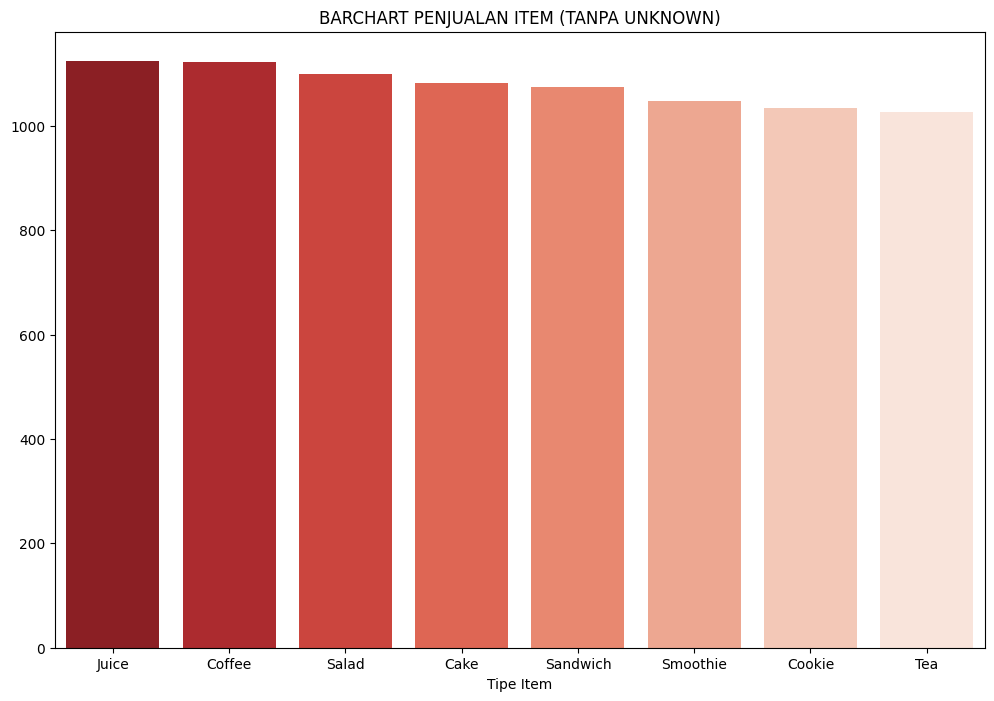

In [20]:
#Visualisasi tanpa unkown
top_selling_item_2 = df[df['Item'] != "Unknown"]['Item'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=top_selling_item_2.index, y=top_selling_item_2.values, palette="Reds_r")
plt.title("BARCHART PENJUALAN ITEM (TANPA UNKNOWN)")
plt.xlabel("Tipe Item")
plt.show()

In [21]:
#Payment method terbanyak yang sering digunakan 
top_payment_method = df['Payment Method'].value_counts().sort_values(ascending=False)
top_payment_method


Payment Method
Unknown           3015
Digital Wallet    2197
Credit Card       2170
Cash              2158
Name: count, dtype: int64

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\3640648719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_payment_method.index, y=top_payment_method.values, palette="Reds_r")


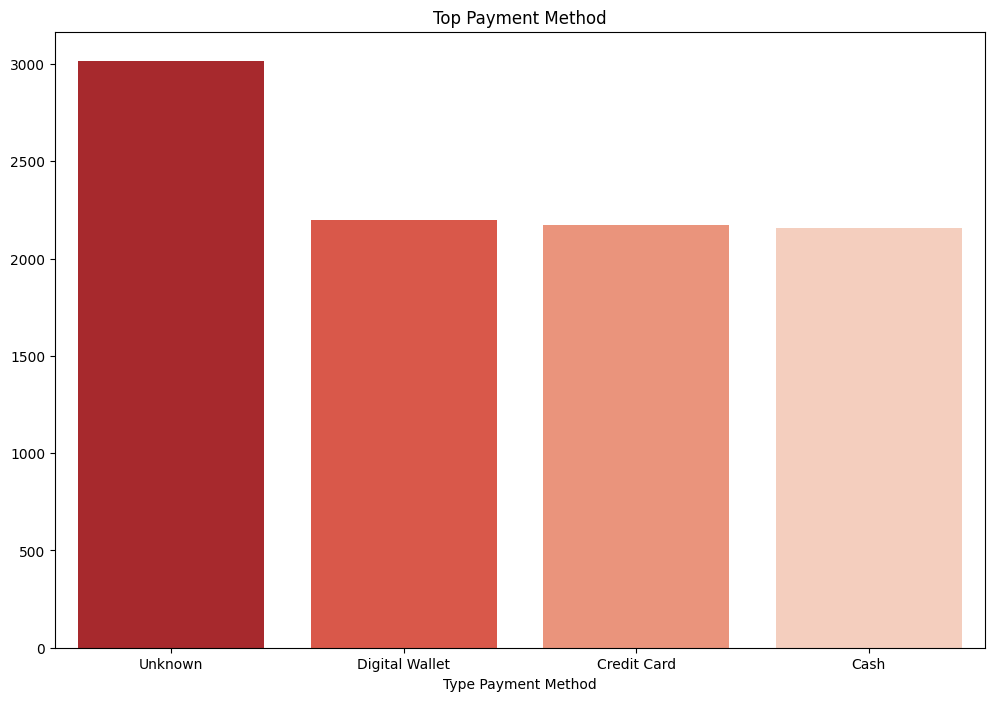

In [22]:
#Menampilkan visualisasi top payment method dengan menampilkan unknown
plt.figure(figsize=(12,8))
sns.barplot(x=top_payment_method.index, y=top_payment_method.values, palette="Reds_r")
plt.title("Top Payment Method")
plt.xlabel("Type Payment Method")
plt.show()

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\188418993.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=barchart_no_unknown.index, y=barchart_no_unknown.values, palette="Reds_r")


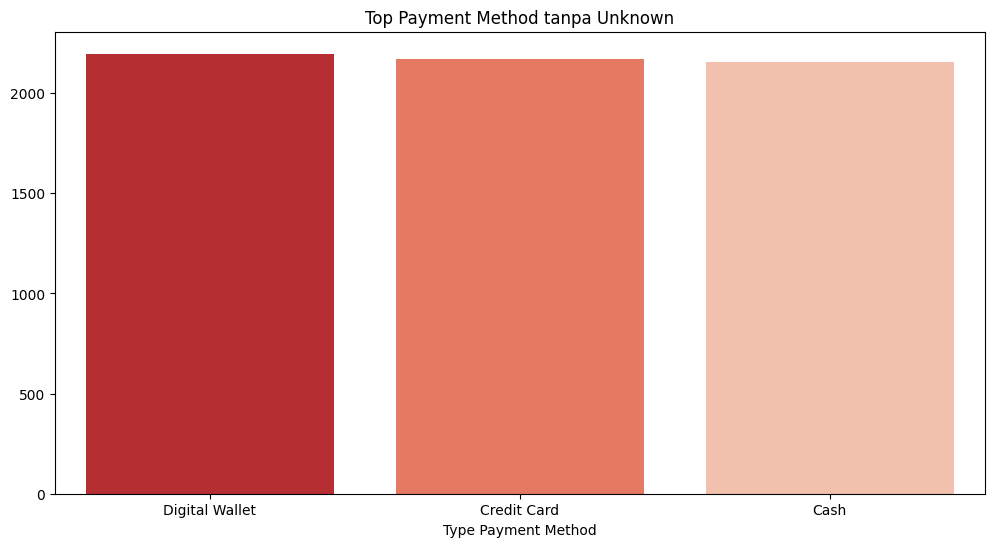

In [23]:
#Menampilkan tanpa unknown
barchart_no_unknown = df[df['Payment Method'] != "Unknown"]['Payment Method'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=barchart_no_unknown.index, y=barchart_no_unknown.values, palette="Reds_r")
plt.title("Top Payment Method tanpa Unknown")
plt.xlabel("Type Payment Method")
plt.show()

In [24]:
df.sample(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2634,TXN_2544724,Cake,5.0,3.0,15.0,Digital Wallet,Takeaway,2023-12-28
9545,TXN_1701766,Cake,4.0,3.0,12.0,Unknown,Unknown,2023-11-22
4957,TXN_8589003,Tea,4.0,1.5,8.0,Cash,Unknown,2023-08-25
7872,TXN_4060215,Salad,3.0,5.0,15.0,Credit Card,In-store,2023-01-12
1731,TXN_2463115,Sandwich,5.0,4.0,20.0,Credit Card,Takeaway,2023-09-12
7055,TXN_2866735,Cookie,4.0,1.0,4.0,Cash,Takeaway,2023-03-13
1679,TXN_7100596,Smoothie,5.0,4.0,20.0,Credit Card,In-store,2023-09-14
608,TXN_2237115,Coffee,1.0,2.0,2.0,Unknown,Takeaway,2023-01-13
3538,TXN_7435796,Coffee,2.0,2.0,4.0,Cash,In-store,2023-11-03
8049,TXN_2755642,Cake,3.0,3.0,9.0,Digital Wallet,In-store,2023-03-24


In [25]:
#Menampilkan total penjualan dari masing-masing item
total_penjualan_item = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
total_penjualan_item

Item
Salad       16263.0
Sandwich    12824.0
Smoothie    12576.0
Juice        9956.0
Cake         9777.0
Unknown      8131.0
Coffee       6922.0
Tea          4813.5
Cookie       3346.0
Name: Total Spent, dtype: float64

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\69458991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_penjualan_item.index, y=total_penjualan_item.values, palette="Reds_r")


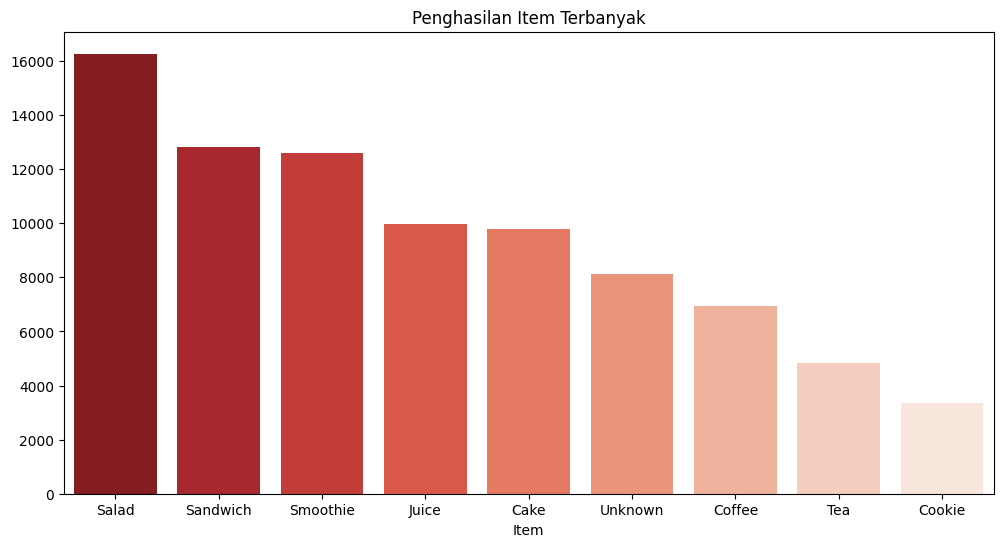

In [26]:
#menampilkan dengan barchart
plt.figure(figsize=(12,6))
sns.barplot(x=total_penjualan_item.index, y=total_penjualan_item.values, palette="Reds_r")
plt.title("Penghasilan Item Terbanyak")
plt.show()

In [27]:
#Tampilkan bulan apa yang sering dibeli oleh pelanggan

#tambahkan tabel "Bulan" dan pisahkan dari Transcation Date
df['Bulan'] = df['Transaction Date'].dt.month_name()

#tampilkan
df.head(2)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Bulan
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,September
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,May


C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\1231356948.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bulan_pembelian.index, y=top_bulan_pembelian.values, palette="Blues_r")


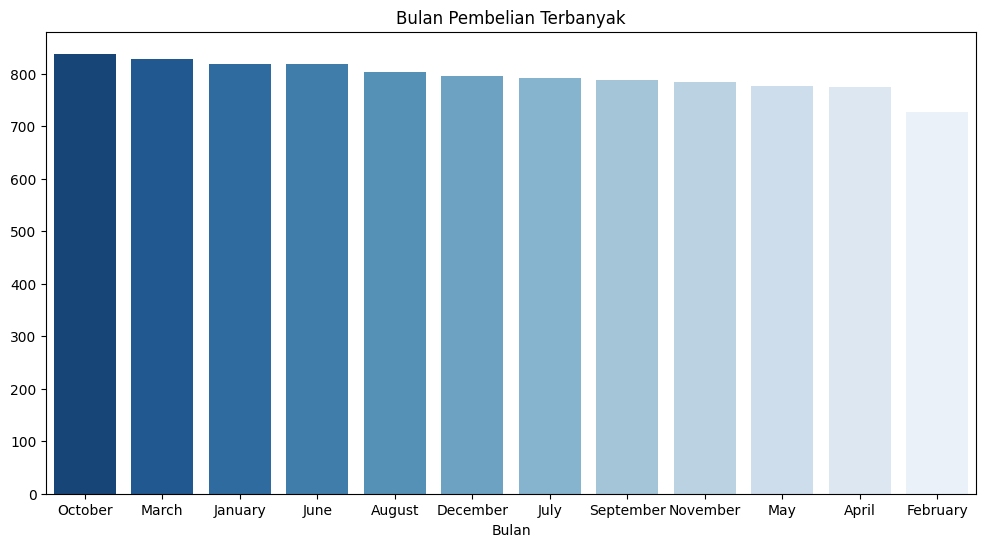

In [28]:
#Setelah bulan terpisah, lalu hitung value counts nya
top_bulan_pembelian = df['Bulan'].value_counts()
top_bulan_pembelian

#tampilkan visualisasinya
plt.figure(figsize=(12,6))
sns.barplot(x=top_bulan_pembelian.index, y=top_bulan_pembelian.values, palette="Blues_r")
plt.title("Bulan Pembelian Terbanyak")
plt.xlabel("Bulan")
plt.show()

In [29]:
top_bulan_pembelian

Bulan
October      838
March        827
January      818
June         818
August       803
December     795
July         791
September    788
November     784
May          777
April        774
February     727
Name: count, dtype: int64

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\982920090.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_heatmap = df.groupby(['Item','Bulan']).size().unstack(fill_value=0)


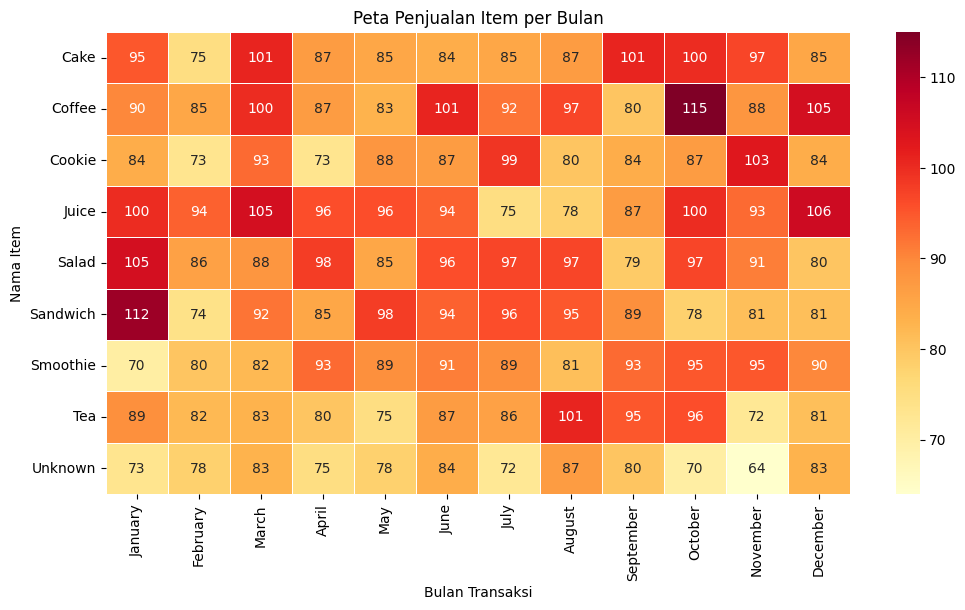

In [30]:
#Melihat penjualan item  berdasarkan bulan

#Check kata unik pada bulan
df['Bulan'].unique()

#Buat urutan bulan yang sesuao
urutan_bulan = [ 'January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

#ubah pada kolom bulan menjadi categorical
df['Bulan'] = pd.Categorical(df['Bulan'], categories = urutan_bulan, ordered=True)

#groupby bulan dengan item untuk dibuat heatmap
data_heatmap = df.groupby(['Item','Bulan']).size().unstack(fill_value=0)

# Visualisasi Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_heatmap, cmap="YlOrRd", annot=True, fmt="d", linewidths=0.5)

plt.title("Peta Penjualan Item per Bulan")
plt.xlabel("Bulan Transaksi")
plt.ylabel("Nama Item")
plt.show()

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\1957959380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lokasi_sesuai_bulan = df.groupby(['Location','Bulan']).size().unstack(fill_value=0)


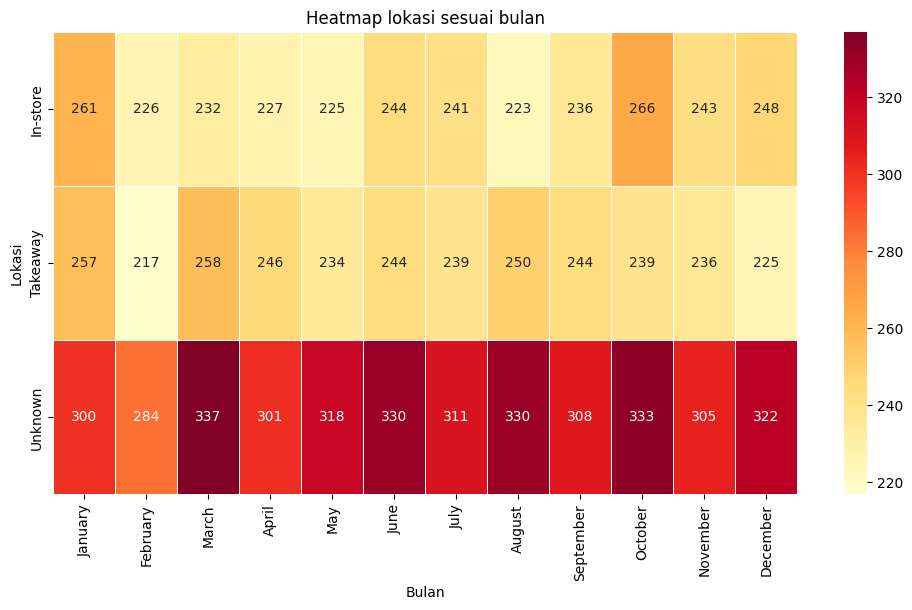

In [31]:
#Bulan apa yang sesuai dengan pelanggan membeli di location (Takeaway/In-Store)
lokasi_sesuai_bulan = df.groupby(['Location','Bulan']).size().unstack(fill_value=0)
lokasi_sesuai_bulan

#visualisasi heatmap
plt.figure(figsize=(12,6))
sns.heatmap(lokasi_sesuai_bulan, cmap="YlOrRd", annot=True, fmt="d", linewidths=0.5)
plt.title("Heatmap lokasi sesuai bulan")
plt.xlabel("Bulan")
plt.ylabel("Lokasi")
plt.show()

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\2642116804.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_payment_by_cake.index, y=top_payment_by_cake.values, palette="Reds_r")


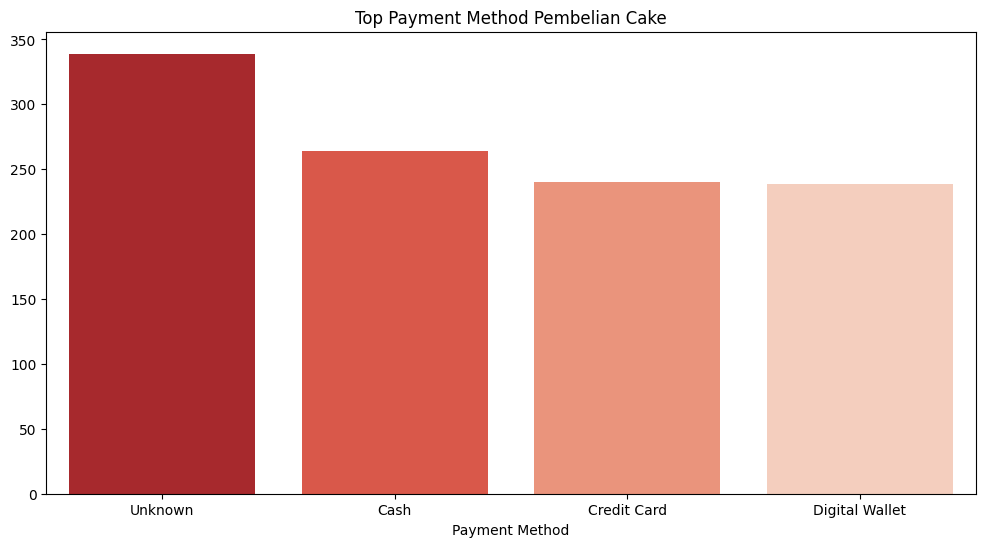

In [32]:
#Hitung pembelian khusus cake aja, dan tipe pembayaran nya lebih sering yang mana

#filter cake
df_item_cake = df[df['Item'] == "Cake"]

#grupby item cake dengan payment method
top_payment_by_cake = df_item_cake['Payment Method'].value_counts().sort_values(ascending=False)
top_payment_by_cake

#tampilkan visualisasi (dengan Unknown)
plt.figure(figsize=(12,6))
sns.barplot(x=top_payment_by_cake.index, y=top_payment_by_cake.values, palette="Reds_r")
plt.title("Top Payment Method Pembelian Cake")
plt.xlabel("Payment Method")
plt.show()

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\1311877991.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kedatangan_pengunjung.index, y=top_kedatangan_pengunjung.values,


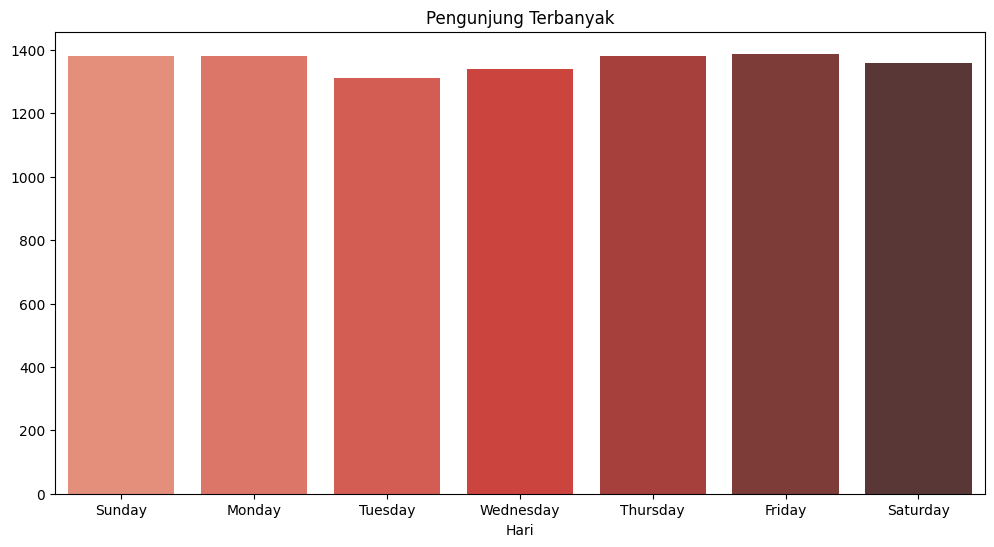

In [33]:
#melihat hari yang paling ramai pengunjung

#buat tabel baru bernama "Hari", kemudian pisahkan dengan Transaction Date
df['Hari'] = df['Transaction Date'].dt.day_name()
df.head(5)

#Buat visualisasi
#1. Sebelum buat visualisasi, Urutkan hari nya dulu
urutan_hari = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

#2. Ubah df['Hari'] menjadi Categorical
df['Hari'] = pd.Categorical(df['Hari'], categories=urutan_hari, ordered=True)

#3. Hitung value counts
top_kedatangan_pengunjung = df['Hari'].value_counts().sort_index()

#4. Buat visualisasinya
plt.figure(figsize=(12,6))
sns.barplot(x=top_kedatangan_pengunjung.index, y=top_kedatangan_pengunjung.values, 
            palette="Reds_d")
plt.title("Pengunjung Terbanyak")
plt.xlabel("Hari")
plt.show()

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\3111307377.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_by_hari = df.groupby(['Item','Hari']).size().unstack(fill_value=0)


<Axes: xlabel='Hari', ylabel='Item'>

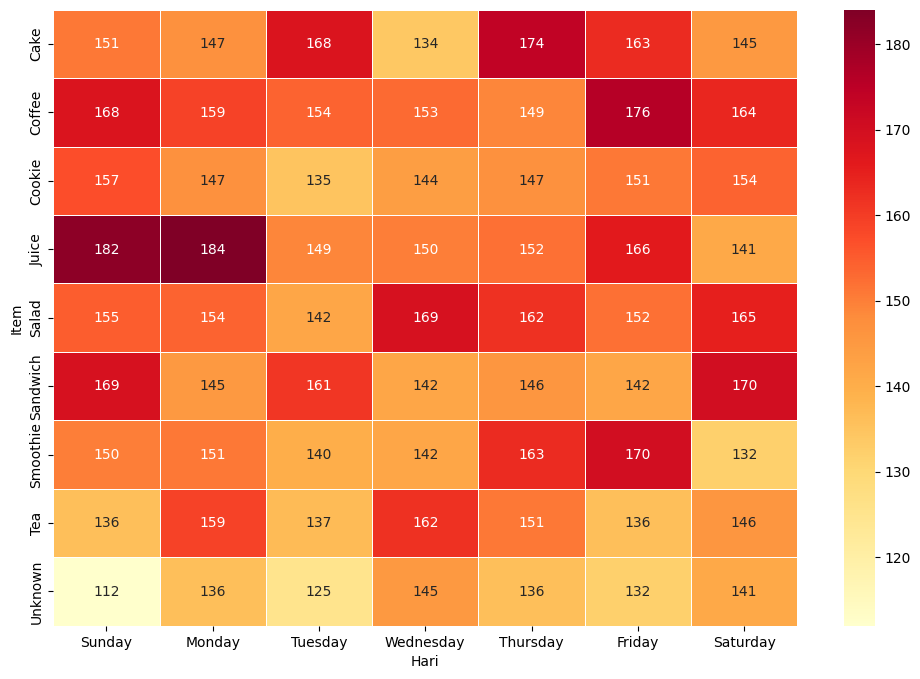

In [34]:
#Buat visualisasi juga di hari-hari tertentu lebih banyak beli item apa
item_by_hari = df.groupby(['Item','Hari']).size().unstack(fill_value=0)
item_by_hari

#visualisasi
plt.figure(figsize=(12,8))
sns.heatmap(item_by_hari, cmap="YlOrRd", annot=True, fmt="d", linewidths=0.5)

C:\Users\Rikhan\AppData\Local\Temp\ipykernel_17384\3353482967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_item.index, y=mean_item.values, palette="Reds_r")


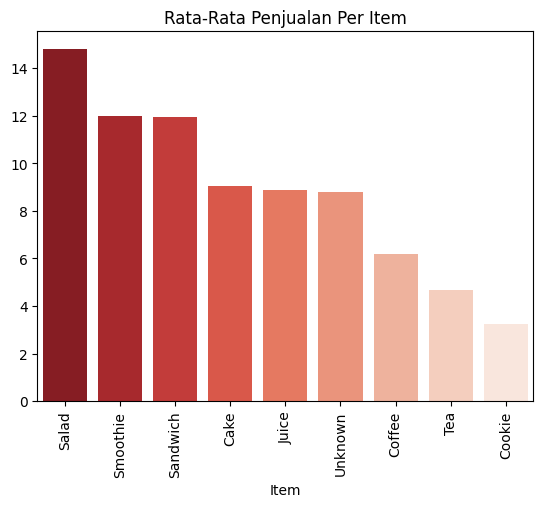

In [35]:
#rata-rata penjualan per-item
df.head(10)

mean_item = df.groupby('Item')['Total Spent'].mean().sort_values(ascending=False)
mean_item

plt.Figure(figsize=(12,6))
sns.barplot(x=mean_item.index, y=mean_item.values, palette="Reds_r")
plt.title("Rata-Rata Penjualan Per Item")
plt.xlabel("Item")
plt.xticks(fontsize=10, rotation=90)
plt.show()